# Factors Affecting the Winning of a Chess Game (Lichess)
## by Yasser Ali

## Investigation Overview

I want to know what makes a player, as black or white, **win** the game and whether player as white always have the advantage or not. Also, it is interesting to know what are the attributes associated with each **final game result.**

## Dataset Overview

This dataset contains information about the most recent 20,000 games (at its time) played by the top 100 teams on [Lichess](https://www.lichess.org). It includes information about each game like; rating of the players, opening codes, game rating, number of turns, and who wins each game and how he/she wins it.<br>


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
# load in the dataset into a pandas dataframe
games = pd.read_csv("games-mod.csv")


# the equation for calculating estimated game time (rounding to nearest 0.5)
games['estimated_time'] = round((games.base_time + games.increment*40/60) * 2)/2

# initiate the game_rating column with the values of estimated time
games['game_rating'] = games['estimated_time']

# replacing estimated game time with associated game rating
games['game_rating'] = games['game_rating'].apply(lambda x : 'bullet' if x<3 
       
                                                  else ('blitz' if x<10 else 'rapid'))

# converting game_rating data type to ordered categorical data type 
ratings = ['bullet', 'blitz', 'rapid']
ratings_cat = pd.api.types.CategoricalDtype(categories= ratings, ordered=True)
games['game_rating'] = games['game_rating'].astype(ratings_cat)


# dropping columns
games.drop(columns=['base_time', 'increment'], inplace = True)


 # keep rows of winnings only
games = games.loc[(games['victory_status'].isin(['resign','mate']))] 
# reseting index to fill gaps in the index
games.reset_index(drop=True, inplace=True)   


# keeping rated games only and dropping unrated games
games = games[games['rated']==True] 
# dropping 'rated' column as it contains a single value
games.drop(columns='rated', axis=1, inplace= True)
# reseting index to fill gaps in the index
games.reset_index(drop=True, inplace=True)



# drop rows with number of turns < 4
games = games[(games['turns']>=4)]
# reseting index to fill gaps in the index
games.reset_index(drop=True, inplace=True)

# adding new column for difference in rating between white and black
games['rating_diff_wb'] = games['white_rating'] - games['black_rating'] 

# adding new column for absolute difference in rating 
games['abs_rating_diff_wb'] = abs(games['white_rating'] - games['black_rating'])



# keeping volume labels and remove the rest of the codes
games['opening_eco']= games['opening_eco'].apply(lambda x: x[0]) 

# converting opening_eco data type to ordered categorical data type (alphabetically)
openings = ['A', 'B', 'C', 'D', 'E']
openings_cat = pd.api.types.CategoricalDtype(categories= openings, ordered=True)
games['opening_eco'] = games['opening_eco'].astype(openings_cat)



# making a sample of data to use for scatter plots
games_sample= games.sample(1000, replace=False, random_state=100)

print(games.shape)
games.head()

(13945, 10)


,turns,victory_status,winner,white_rating,black_rating,opening_eco,estimated_time,game_rating,rating_diff_wb,abs_rating_diff_wb
0,16,resign,black,1322,1261,B,11.5,rapid,61,61
1,61,mate,white,1496,1500,C,11.5,rapid,-4,4
2,61,mate,white,1439,1454,D,20.0,rapid,-15,15
3,95,mate,white,1523,1469,C,32.0,rapid,54,54
4,33,resign,white,1520,1423,D,10.0,rapid,97,97


## Winners, White and Black, Distribution 

Player as white has slightly more wins than player as black, but this doesn't conclude that white always has an advantage over black.

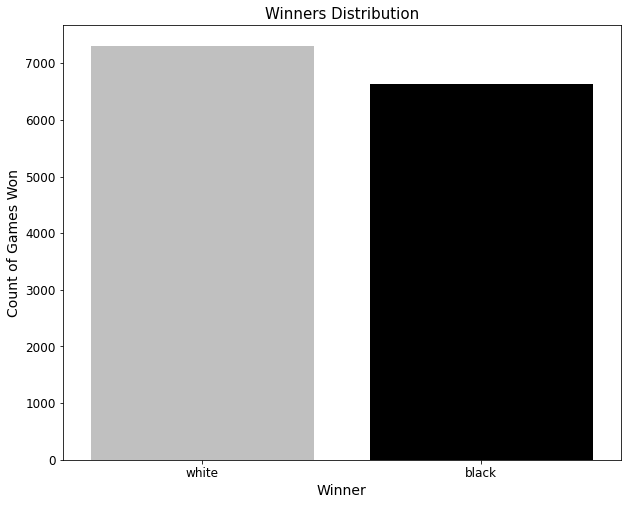

In [5]:
# plotting bar chart for the distribution of the winners; white and black
plt.figure(figsize=(10,8))
sb.countplot(data=games, x='winner', palette=['silver','black'], order=['white','black']);
plt.xlabel('Winner', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count of Games Won', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Winners Distribution', fontsize=15);

## How Rating Difference and Number of Turns Affects Who Win the Game?

* Most of the games are played between players of the **same or close rating** and lasted until about **40 to 70 turns**.


* Players, as white or as black, are **winning** more when their **ratings are higher** than their opponents compared to when they have less rating than their opponents.


* Games that are played with **high difference in rating** in the winner's favor tend to end in **less number of turns** than those with lower difference in rating.


* There are more players as **black winning** the game with **high number of turns** specially when the rating difference is small.

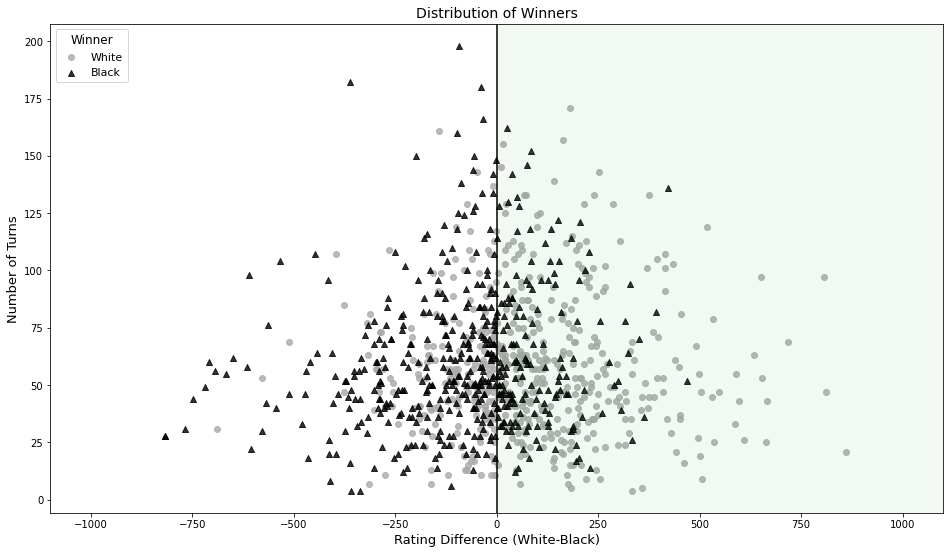

In [6]:
# scatter plot of rating difference versus number of turns for each winner
winner_markers= [['white', 'o', 'darkgray'],
                ['black', '^', 'black']]

plt.figure(figsize=(16,9))
for winner, marker, color in winner_markers:
    sb.regplot(data = games_sample.loc[games_sample['winner']==winner], x = 'rating_diff_wb', y = 'turns',
               x_jitter=5,fit_reg = False, marker = marker, scatter_kws={'color':color});

plt.legend(title='Winner',labels=['White','Black'],title_fontsize=12, fontsize=11);
plt.axvspan(0, 1100, facecolor='g', alpha=0.05)
plt.axvline(0, color='k')
plt.xlim(-1100,1100)
plt.xlabel('Rating Difference (White-Black)', fontsize=13)
plt.ylabel('Number of Turns', fontsize=13);
plt.title('Distribution of Winners', fontsize=14);

## Distributions of White and Black Winning Percentages over Game Ratings & Openings

- Player as white has more advantage over player as black in blitz rating games.
- Highest winning percentage for white is at opening group C while, surprisingly, black has slight advantage when using opening group E which is rarely used.



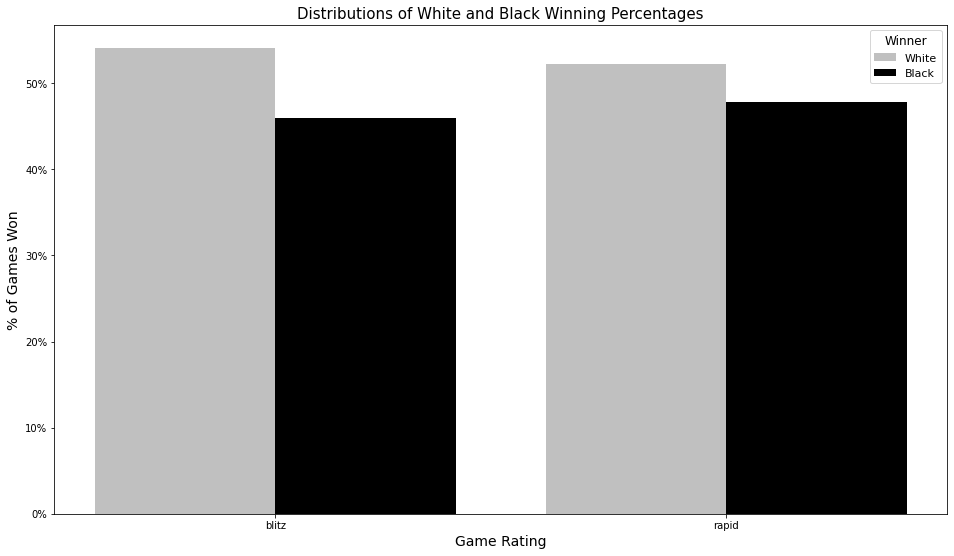

In [7]:
def winner_percentages(var, xlabel, title):
        ''' A function to plot the percentage of games won for each winner, white and black,
            and its variation with a variable
            var: (string) the variable you want to plot the variation with.
        '''
        white_counts = games.query('winner == "white"').groupby(var)[var].count()
        black_counts = games.query('winner == "black"').groupby(var)[var].count()
        game_var_counts = games[var].value_counts()
        
        white_var_pct= (white_counts/game_var_counts)*100
        black_var_pct= (black_counts/game_var_counts)*100
        plt.figure(figsize=(16,9))
        plt.bar(data= games, x=white_var_pct.index, height=white_var_pct,
                width=-0.4, align='edge', color='silver',label='white');

        plt.bar(data= games, x=black_var_pct.index, height=black_var_pct, 
                width=0.4, align='edge', color='black', label='black');

        ticks= [0,10,20,30,40,50]
        labels = ['{}%'.format(t) for t in ticks]
        plt.yticks(ticks, labels);
        plt.ylabel('% of Games Won', fontsize=14)
        plt.xlabel(xlabel, fontsize=14)
        plt.title(title, fontsize=15)
        plt.legend(title='Winner', title_fontsize=12, fontsize=11, labels=['White','Black']);

winner_percentages('game_rating','Game Rating' ,'Distributions of White and Black Winning Percentages');

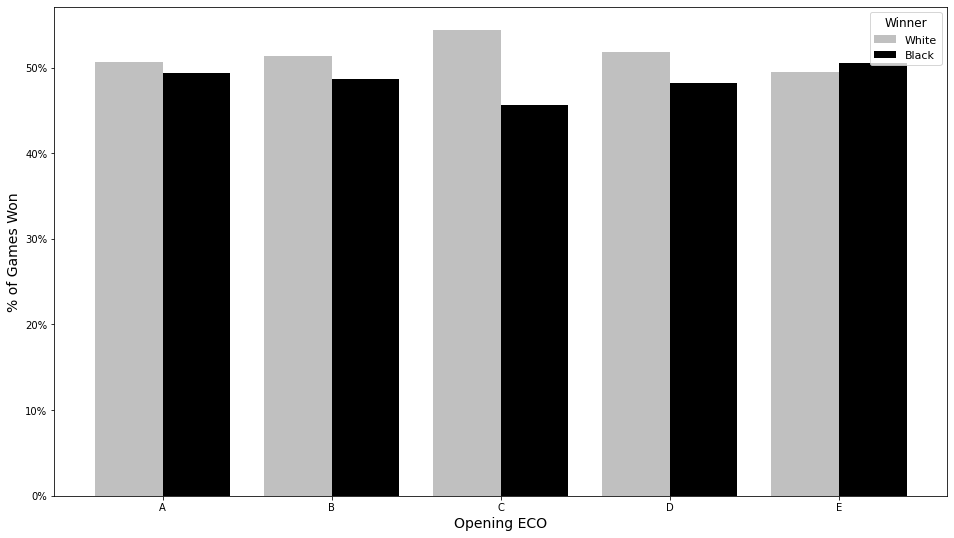

In [8]:
winner_percentages('opening_eco','Opening ECO', '');

## How Number of Turns in a Game Vary with Game Rating over Different Rating Differences between Players?

Blitz rating games are won at high rating difference with less number of turns compared to the majority of rapid rating games.


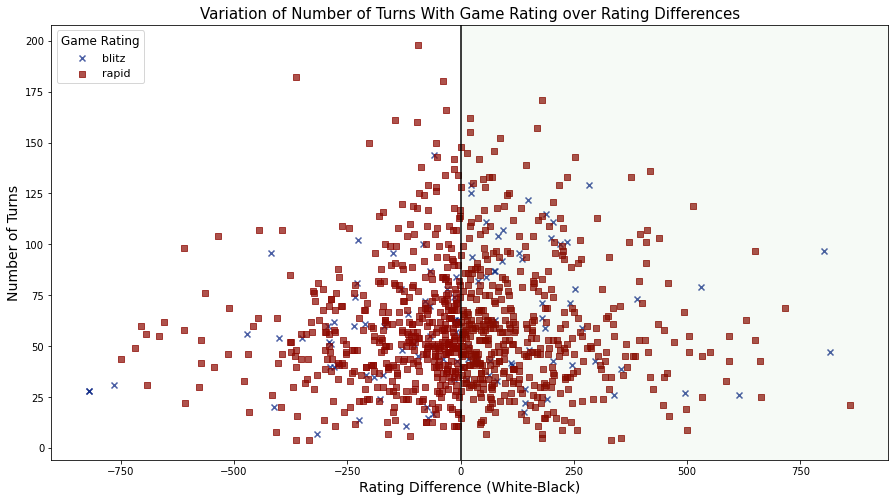

In [9]:
# scatter plot of rating difference versus number of turns for each game rating
gameRating_markers= [['blitz', 'x', sb.color_palette('dark')[0]],
                ['rapid', 's', sb.color_palette('dark')[3]]]

plt.figure(figsize=(15,8))
for gameRating, marker, color in gameRating_markers:
    ax=sb.regplot(data = games_sample.loc[games_sample['game_rating']==gameRating], x = 'rating_diff_wb', y = 'turns',
               fit_reg = False, marker = marker, scatter_kws={'alpha':0.7,'color': color});

plt.legend(title='Game Rating', labels=['blitz','rapid'], title_fontsize=12, fontsize=11);
plt.xlim(ax.get_xlim())
plt.axvspan(0,ax.get_xlim()[1], facecolor='g', alpha=0.035)
plt.axvline(0, color='k')
plt.xlabel('Rating Difference (White-Black)', fontsize=14)
plt.ylabel('Number of Turns', fontsize=14);
plt.title('Variation of Number of Turns With Game Rating over Rating Differences', fontsize=15);

## Variation of Number of Turns with the Winner and the Victory Status over all Opening Codes

* It takes black more number of turns, on average to win in each opening group.
* Resigning from a game happens after less number of turns compared to checkmate in all opening groups that winner could use.

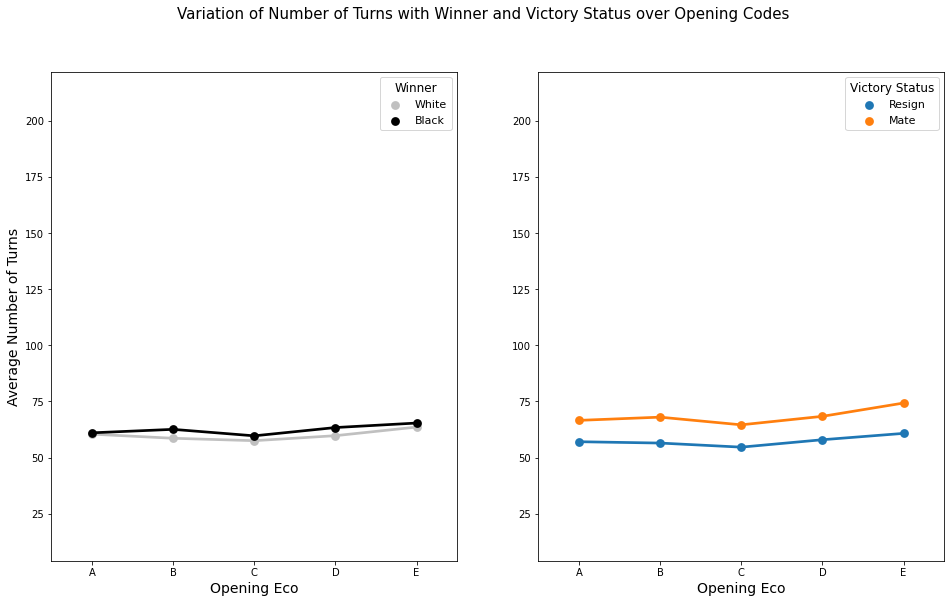

In [10]:
# plotting the opening groups against the number of turns for each winner
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
ax= sb.pointplot(data=games, x='opening_eco', y='turns', hue='winner', hue_order=['white','black'],
            palette=['silver', 'black'], ci=False)
plt.xlabel('Opening Eco', fontsize=14)
plt.ylabel('Average Number of Turns', fontsize=14);
plt.ylim(games['turns'].min(),games['turns'].max());
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles,['White','Black'] ,title='Winner', title_fontsize=12, fontsize=11)

# plotting the opening groups against the number of turns for each victory status
plt.subplot(1,2,2)
ax=sb.pointplot(data=games, x='opening_eco', y='turns', hue='victory_status', hue_order=['resign','mate'],
            ci=False)
plt.xlabel('Opening Eco', fontsize=14)
plt.ylabel('');
plt.ylim(games['turns'].min(),games['turns'].max());
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Resign', 'Mate'], title='Victory Status', title_fontsize=12, fontsize=11)
fig = plt.gcf()
fig.suptitle("Variation of Number of Turns with Winner and Victory Status over Opening Codes", fontsize=15);